In [1]:
# !pip install -U scikit-learn
import pandas as pd
import numpy as np
from platform import python_version
import numpy as np
from shapely.geometry import shape
import matplotlib.pyplot as plt

# Import the kerastuner library
import keras_tuner as kt
import tensorflow as tf
pd.set_option('display.max_columns', 100)

%precision 2
import pandas as pd
from datetime import datetime
%matplotlib inline


import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline



# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


# Start a SparkSession
import findspark
findspark.init()

In [2]:
df = pd.read_csv('Resources/2020_Clean_Traffic_Crashes.csv')

In [3]:
df

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR,INJURY_CAT,DAMAGE_COST,year
0,JD184955,2020-03-13 21:45:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,$500 OR LESS,FOLLOWING TOO CLOSELY,183,S,WELLS ST,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,21,6,3,41.879415,-87.633606,2020,0,500,2020
1,JD116085,2020-01-14 23:15:00,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",IMPROPER TURNING/NO SIGNAL,1214,E,53RD ST,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,23,3,1,41.799572,-87.595997,2020,0,1000,2020
2,JD122763,2020-01-20 22:48:00,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,UNKNOWN INTERSECTION TYPE,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",DISREGARDING STOP SIGN,3424,W,OGDEN AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,22,2,1,41.856015,-87.711318,2020,0,1500,2020
3,JD134580,2020-01-30 22:54:00,30,UNKNOWN,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR TO FRONT,UNKNOWN INTERSECTION TYPE,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",NOT APPLICABLE,3700,W,CONGRESS PKWY,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,22,5,1,41.874595,-87.718136,2020,0,1500,2020
4,JD159847,2020-02-20 19:50:00,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,4164,W,WABANSIA AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,19,5,2,41.911754,-87.731212,2020,0,1000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24366,JD189551,2020-03-13 14:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,101,W,87TH ST,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,14,6,3,41.736154,-87.627240,2020,0,1500,2020
24367,JD149870,2020-02-13 00:05:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DARKNESS,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",NOT APPLICABLE,13000,S,STONY ISLAND AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0,5,2,0.000000,0.000000,2020,1,1500,2020
24368,JD144014,2020-02-07 20:23:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,815,S,AUSTIN BLVD,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,20,6,2,0.000000,0.000000,2020,0,1000,2020
24369,JD118213,2020-01-16 17:30:00,30,UNKNOWN,FUNCTIONING PROPERLY,CLEAR,DUSK,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,502,W,OHARE ST,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,17,5,1,0.000000,0.000000,2020,0,1000,2020


In [4]:
df.CRASH_TYPE.value_counts()

NO INJURY / DRIVE AWAY              17606
INJURY AND / OR TOW DUE TO CRASH     6765
Name: CRASH_TYPE, dtype: int64

In [5]:
# retrieving list of numeric columns 
num_cols = df.select_dtypes('number').columns.tolist()
num_cols

['POSTED_SPEED_LIMIT',
 'STREET_NO',
 'NUM_UNITS',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'CRASH_YEAR',
 'INJURY_CAT',
 'DAMAGE_COST',
 'year']

In [6]:
# Encoding catagory variables
# retrieving list of categorical columns 
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols

['RD_NO',
 'CRASH_DATE',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'WORK_ZONE_TYPE',
 'MOST_SEVERE_INJURY']

In [7]:
# Scaling the numeric columns
crash_data_scaled = StandardScaler().fit_transform(df[['POSTED_SPEED_LIMIT',
 'STREET_NO',
 'NUM_UNITS',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'CRASH_YEAR',
 'INJURY_CAT',
 'year']])

# Creating a DataFrame with with the scaled data
df_crash_transformed = pd.DataFrame(crash_data_scaled, columns=['POSTED_SPEED_LIMIT',
 'STREET_NO',
 'NUM_UNITS',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'CRASH_YEAR',
 'INJURY_CAT',
 'year'])

# Display sample data
df_crash_transformed.head()

,POSTED_SPEED_LIMIT,STREET_NO,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR,INJURY_CAT,year
0,-0.598819,-1.220573,-0.070527,-0.329705,-0.027324,-0.126388,1.446452,0.925862,1.371172,0.102790,-0.091939,0.0,-0.619874,0.0
1,0.261615,-0.860676,-0.070527,-0.329705,-0.027324,-0.126388,1.807973,-0.617481,-1.162422,0.083023,-0.087493,0.0,-0.619874,0.0
2,1.122048,-0.089219,-0.070527,-0.329705,-0.027324,-0.126388,1.627213,-1.131928,-1.162422,0.096996,-0.101125,0.0,-0.619874,0.0
3,0.261615,0.007126,-0.070527,-0.329705,-0.027324,-0.126388,1.627213,0.411415,-1.162422,0.101596,-0.101931,0.0,-0.619874,0.0
4,-1.459252,0.169097,-0.070527,-0.329705,-0.027324,-0.126388,1.084932,0.411415,0.104375,0.110796,-0.103477,0.0,-0.619874,0.0


In [8]:
# Encoding catagory variables
# retrieving list of categorical columns 
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols

['RD_NO',
 'CRASH_DATE',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'WORK_ZONE_TYPE',
 'MOST_SEVERE_INJURY']

In [9]:
df_crash_dummies = pd.get_dummies(df[['RD_NO',
 'CRASH_DATE',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'WORK_ZONE_TYPE',
 'MOST_SEVERE_INJURY']])

In [10]:
# Display sample data
df_crash_dummies.head()

,RD_NO_DJ166726,RD_NO_DJ177595,RD_NO_HD114501,RD_NO_JB115285,RD_NO_JB135782,RD_NO_JB137837,RD_NO_JB140557,RD_NO_JB140875,RD_NO_JB151260,RD_NO_JB174997,RD_NO_JB184588,RD_NO_JB189494,RD_NO_JC100035,RD_NO_JC100287,RD_NO_JC100614,RD_NO_JC100628,RD_NO_JC100678,RD_NO_JC100935,RD_NO_JC101015,RD_NO_JC101356,RD_NO_JC101578,RD_NO_JC101767,RD_NO_JC101780,RD_NO_JC102097,RD_NO_JC102125,RD_NO_JC102158,RD_NO_JC102296,RD_NO_JC102526,RD_NO_JC102606,RD_NO_JC102675,RD_NO_JC102806,RD_NO_JC102847,RD_NO_JC102869,RD_NO_JC102985,RD_NO_JC103157,RD_NO_JC103244,RD_NO_JC103329,RD_NO_JC103537,RD_NO_JC103539,RD_NO_JC103893,RD_NO_JC104045,RD_NO_JC104077,RD_NO_JC104518,RD_NO_JC104646,RD_NO_JC104978,RD_NO_JC105255,RD_NO_JC105261,RD_NO_JC105328,RD_NO_JC105353,RD_NO_JC105387,...,STREET_NAME_WALTON ST,STREET_NAME_WARNER AVE,STREET_NAME_WARREN BLVD,STREET_NAME_WARWICK AVE,STREET_NAME_WASHBURNE AVE,STREET_NAME_WASHINGTON BLVD,STREET_NAME_WASHINGTON ST,STREET_NAME_WASHTENAW AVE,STREET_NAME_WAVELAND AVE,STREET_NAME_WAYMAN ST,STREET_NAME_WAYNE AVE,STREET_NAME_WEBSTER AVE,STREET_NAME_WELLINGTON AVE,STREET_NAME_WELLS ST,STREET_NAME_WENTWORTH AVE,STREET_NAME_WEST END AVE,STREET_NAME_WESTERN AVE,STREET_NAME_WESTERN BLVD,STREET_NAME_WESTSHORE DR,STREET_NAME_WHIPPLE ST,STREET_NAME_WIELAND ST,STREET_NAME_WILCOX ST,STREET_NAME_WILLOW ST,STREET_NAME_WILSON AVE,STREET_NAME_WILSON DR,STREET_NAME_WINCHESTER AVE,STREET_NAME_WINDSOR AVE,STREET_NAME_WINNEMAC AVE,STREET_NAME_WINONA ST,STREET_NAME_WINSTON AVE,STREET_NAME_WINTHROP AVE,STREET_NAME_WISCONSIN ST,STREET_NAME_WOLCOTT AVE,STREET_NAME_WOLF POINT PLZ,STREET_NAME_WOLFRAM ST,STREET_NAME_WOOD ST,STREET_NAME_WOODLAWN AVE,STREET_NAME_WRIGHTWOOD AVE,STREET_NAME_YALE AVE,STREET_NAME_YATES BLVD,STREET_NAME_ZEMKE RD,WORK_ZONE_TYPE_CONSTRUCTION,WORK_ZONE_TYPE_MAINTENANCE,WORK_ZONE_TYPE_UNKNOWN,WORK_ZONE_TYPE_UTILITY,MOST_SEVERE_INJURY_FATAL,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
# Concatenate the `df_crash_transformed` encoded dummies with the scaled data DataFrame
final_crash_scaled = pd.concat([df_crash_transformed,df_crash_dummies], axis=1)

# Display the sample data
final_crash_scaled.head()

,POSTED_SPEED_LIMIT,STREET_NO,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR,INJURY_CAT,year,RD_NO_DJ166726,RD_NO_DJ177595,RD_NO_HD114501,RD_NO_JB115285,RD_NO_JB135782,RD_NO_JB137837,RD_NO_JB140557,RD_NO_JB140875,RD_NO_JB151260,RD_NO_JB174997,RD_NO_JB184588,RD_NO_JB189494,RD_NO_JC100035,RD_NO_JC100287,RD_NO_JC100614,RD_NO_JC100628,RD_NO_JC100678,RD_NO_JC100935,RD_NO_JC101015,RD_NO_JC101356,RD_NO_JC101578,RD_NO_JC101767,RD_NO_JC101780,RD_NO_JC102097,RD_NO_JC102125,RD_NO_JC102158,RD_NO_JC102296,RD_NO_JC102526,RD_NO_JC102606,RD_NO_JC102675,RD_NO_JC102806,RD_NO_JC102847,RD_NO_JC102869,RD_NO_JC102985,RD_NO_JC103157,RD_NO_JC103244,...,STREET_NAME_WALTON ST,STREET_NAME_WARNER AVE,STREET_NAME_WARREN BLVD,STREET_NAME_WARWICK AVE,STREET_NAME_WASHBURNE AVE,STREET_NAME_WASHINGTON BLVD,STREET_NAME_WASHINGTON ST,STREET_NAME_WASHTENAW AVE,STREET_NAME_WAVELAND AVE,STREET_NAME_WAYMAN ST,STREET_NAME_WAYNE AVE,STREET_NAME_WEBSTER AVE,STREET_NAME_WELLINGTON AVE,STREET_NAME_WELLS ST,STREET_NAME_WENTWORTH AVE,STREET_NAME_WEST END AVE,STREET_NAME_WESTERN AVE,STREET_NAME_WESTERN BLVD,STREET_NAME_WESTSHORE DR,STREET_NAME_WHIPPLE ST,STREET_NAME_WIELAND ST,STREET_NAME_WILCOX ST,STREET_NAME_WILLOW ST,STREET_NAME_WILSON AVE,STREET_NAME_WILSON DR,STREET_NAME_WINCHESTER AVE,STREET_NAME_WINDSOR AVE,STREET_NAME_WINNEMAC AVE,STREET_NAME_WINONA ST,STREET_NAME_WINSTON AVE,STREET_NAME_WINTHROP AVE,STREET_NAME_WISCONSIN ST,STREET_NAME_WOLCOTT AVE,STREET_NAME_WOLF POINT PLZ,STREET_NAME_WOLFRAM ST,STREET_NAME_WOOD ST,STREET_NAME_WOODLAWN AVE,STREET_NAME_WRIGHTWOOD AVE,STREET_NAME_YALE AVE,STREET_NAME_YATES BLVD,STREET_NAME_ZEMKE RD,WORK_ZONE_TYPE_CONSTRUCTION,WORK_ZONE_TYPE_MAINTENANCE,WORK_ZONE_TYPE_UNKNOWN,WORK_ZONE_TYPE_UTILITY,MOST_SEVERE_INJURY_FATAL,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
0,-0.598819,-1.220573,-0.070527,-0.329705,-0.027324,-0.126388,1.446452,0.925862,1.371172,0.102790,-0.091939,0.0,-0.619874,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.261615,-0.860676,-0.070527,-0.329705,-0.027324,-0.126388,1.807973,-0.617481,-1.162422,0.083023,-0.087493,0.0,-0.619874,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.122048,-0.089219,-0.070527,-0.329705,-0.027324,-0.126388,1.627213,-1.131928,-1.162422,0.096996,-0.101125,0.0,-0.619874,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.261615,0.007126,-0.070527,-0.329705,-0.027324,-0.126388,1.627213,0.411415,-1.162422,0.101596,-0.101931,0.0,-0.619874,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.459252,0.169097,-0.070527,-0.329705,-0.027324,-0.126388,1.084932,0.411415,0.104375,0.110796,-0.103477,0.0,-0.619874,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = final_crash_scaled['MOST_SEVERE_INJURY_NO INDICATION OF INJURY'].ravel()

# The X variable should include all features except the target
X = final_crash_scaled.drop(columns=['MOST_SEVERE_INJURY_NO INDICATION OF INJURY'])

In [13]:
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [14]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [15]:
X_train.shape

(18278, 41988)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[-0.6 ,  1.16, -0.07, ..., -0.14, -0.28, -0.22],
       [-3.18, -0.78, -0.07, ..., -0.14, -0.28, -0.22],
       [ 0.26,  0.63, -2.2 , ..., -0.14, -0.28, -0.22],
       ...,
       [ 0.26, -0.07, -0.07, ..., -0.14, -0.28, -0.22],
       [ 0.26,  2.61, -0.07, ..., -0.14, -0.28, -0.22],
       [ 0.26, -0.39, -0.07, ..., -0.14, -0.28, -0.22]])

In [17]:
len(X_train_scaled[0])

41988

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 293923    
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 294,050
Trainable params: 294,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Fit the model to the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
572/572 [==============================] - 6s 7ms/step - loss: 0.4362 - accuracy: 0.8482
Epoch 2/100
572/572 [==============================] - 4s 7ms/step - loss: 0.3281 - accuracy: 0.8590
Epoch 3/100
572/572 [==============================] - 4s 7ms/step - loss: 0.2224 - accuracy: 0.8605
Epoch 4/100
572/572 [==============================] - 4s 7ms/step - loss: 0.1776 - accuracy: 0.8869
Epoch 5/100
572/572 [==============================] - 4s 7ms/step - loss: 0.1366 - accuracy: 0.9469
Epoch 6/100
572/572 [==============================] - 4s 8ms/step - loss: 0.1040 - accuracy: 0.9613
Epoch 7/100
572/572 [==============================] - 4s 7ms/step - loss: 0.0862 - accuracy: 0.9687
Epoch 8/100
572/572 [==============================] - 4s 7ms/step - loss: 0.0779 - accuracy: 0.9713
Epoch 9/100
572/572 [==============================] - 4s 7ms/step - loss: 0.0744 - accuracy: 0.9724
Epoch 10/100
572/572 [==============================] - 4s 8ms/step - loss: 0.0719 - accura

572/572 [==============================] - 4s 7ms/step - loss: 0.0200 - accuracy: 0.9864
Epoch 82/100
572/572 [==============================] - 4s 7ms/step - loss: 0.0179 - accuracy: 0.9887
Epoch 83/100
572/572 [==============================] - 4s 7ms/step - loss: 0.0165 - accuracy: 0.9897
Epoch 84/100
572/572 [==============================] - 4s 7ms/step - loss: 0.0161 - accuracy: 0.9902
Epoch 85/100
572/572 [==============================] - 4s 8ms/step - loss: 0.0149 - accuracy: 0.9912
Epoch 86/100
572/572 [==============================] - 4s 7ms/step - loss: 0.0138 - accuracy: 0.9925
Epoch 87/100
572/572 [==============================] - 4s 7ms/step - loss: 0.0137 - accuracy: 0.9923
Epoch 88/100
572/572 [==============================] - 5s 8ms/step - loss: 0.0134 - accuracy: 0.9924
Epoch 89/100
572/572 [==============================] - 5s 8ms/step - loss: 0.0125 - accuracy: 0.9936
Epoch 90/100
572/572 [==============================] - 4s 7ms/step - loss: 0.0123 - accuracy: 

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

191/191 - 1s - loss: 4.3641 - accuracy: 0.8776 - 733ms/epoch - 4ms/step
Loss: 4.364131450653076, Accuracy: 0.8775644302368164


<Axes: >

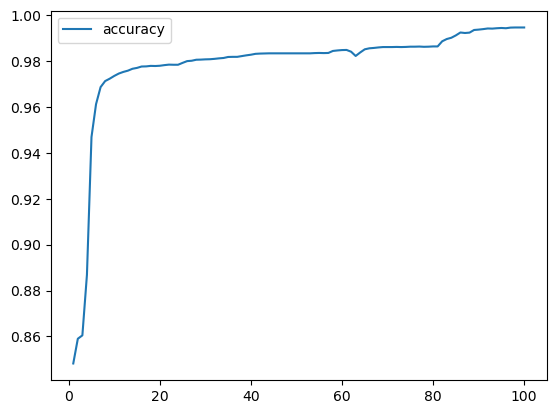

In [22]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [23]:
# Export our model to HDF5 file
nn.save('h5_files/DLmodel1.h5')

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 8
hidden_nodes_layer3= 6

nn_model2 = tf.keras.models.Sequential()

# First hidden layer
nn_model2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
             input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_model2.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn_model2.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                419890    
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
 dense_6 (Dense)             (None, 1)                 7         
                                                                 
Total params: 420,039
Trainable params: 420,039
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Train the model
fit_model2 = nn_model2.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
572/572 [==============================] - 5s 8ms/step - loss: 0.4464 - accuracy: 0.8462
Epoch 2/200
572/572 [==============================] - 5s 8ms/step - loss: 0.3248 - accuracy: 0.8592
Epoch 3/200
572/572 [==============================] - 5s 8ms/step - loss: 0.1766 - accuracy: 0.9420
Epoch 4/200
572/572 [==============================] - 5s 8ms/step - loss: 0.0837 - accuracy: 0.9841
Epoch 5/200
572/572 [==============================] - 5s 9ms/step - loss: 0.0497 - accuracy: 0.9912
Epoch 6/200
572/572 [==============================] - 5s 8ms/step - loss: 0.0318 - accuracy: 0.9949
Epoch 7/200
572/572 [==============================] - 5s 8ms/step - loss: 0.0226 - accuracy: 0.9964
Epoch 8/200
572/572 [==============================] - 5s 8ms/step - loss: 0.0170 - accuracy: 0.9974
Epoch 9/200
572/572 [==============================] - 4s 8ms/step - loss: 0.0127 - accuracy: 0.9981
Epoch 10/200
572/572 [==============================] - 5s 9ms/step - loss: 0.0101 - accura

572/572 [==============================] - 4s 8ms/step - loss: 0.0013 - accuracy: 0.9996
Epoch 82/200
572/572 [==============================] - 5s 9ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 83/200
572/572 [==============================] - 4s 8ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 84/200
572/572 [==============================] - 4s 7ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 85/200
572/572 [==============================] - 4s 8ms/step - loss: 0.0014 - accuracy: 0.9996
Epoch 86/200
572/572 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 87/200
572/572 [==============================] - 4s 7ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 88/200
572/572 [==============================] - 4s 7ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 89/200
572/572 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 90/200
572/572 [==============================] - 5s 8ms/step - loss: 0.0010 - accuracy: 

572/572 [==============================] - 4s 8ms/step - loss: 8.7491e-04 - accuracy: 0.9997
Epoch 161/200
572/572 [==============================] - 4s 7ms/step - loss: 9.0011e-04 - accuracy: 0.9997
Epoch 162/200
572/572 [==============================] - 5s 8ms/step - loss: 8.9153e-04 - accuracy: 0.9997
Epoch 163/200
572/572 [==============================] - 5s 8ms/step - loss: 8.9974e-04 - accuracy: 0.9997
Epoch 164/200
572/572 [==============================] - 4s 7ms/step - loss: 9.0073e-04 - accuracy: 0.9997
Epoch 165/200
572/572 [==============================] - 4s 8ms/step - loss: 8.8354e-04 - accuracy: 0.9997
Epoch 166/200
572/572 [==============================] - 5s 8ms/step - loss: 9.1734e-04 - accuracy: 0.9997
Epoch 167/200
572/572 [==============================] - 4s 8ms/step - loss: 9.2370e-04 - accuracy: 0.9997
Epoch 168/200
572/572 [==============================] - 4s 7ms/step - loss: 9.2937e-04 - accuracy: 0.9997
Epoch 169/200
572/572 [============================

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

191/191 - 1s - loss: 1.5178 - accuracy: 0.8595 - 703ms/epoch - 4ms/step
Loss: 1.5177603960037231, Accuracy: 0.8595108985900879


<Axes: >

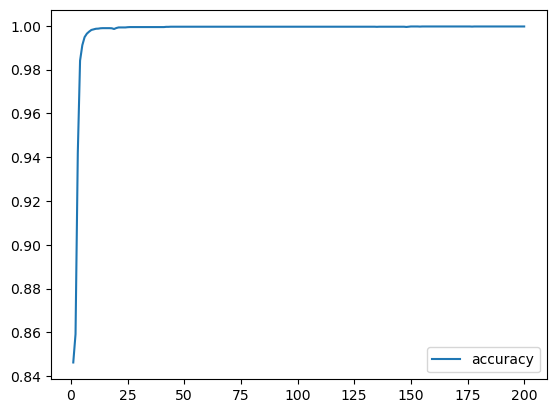

In [28]:
# plotting the accuracy
history_df2 = pd.DataFrame(fit_model2.history, index = range(1, len(fit_model2.history['loss'])+1))
history_df2.plot(y = 'accuracy')

In [29]:
# Export our model to HDF5 file
nn_model2.save('h5_files/DLmodel2.h5')

# Optimization 

In [30]:
!pip install keras-tuner

In [31]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value= 90,
        step=5), activation=activation, input_dim=input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [32]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [33]:
# # Run the kerastuner search for best hyperparameters
# tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [34]:
# # Get top 3 model hyperparameters and print the values
# top_hyper = tuner.get_best_hyperparameters(3)
# for param in top_hyper:
#     print(param.values)

In [35]:
# # Evaluate best model against full test data
# best_model = tuner.get_best_models(1)[0]
# model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [36]:
# # Get best model hyperparameters
# best_hyper = tuner.get_best_hyperparameters(1)[0]
# best_hyper.values

In [37]:
# # Get best model hyperparameters
# best_hyper = tuner.get_best_hyperparameters()[0]
# best_hyper.values

In [38]:
# # Evaluate best model against full test data
# best_model = tuner.get_best_models(1)[0]
# model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [39]:
# nn.save('h5_files/DLmodel3.h5')